In [17]:
import math

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **Bianchi IX visualisations**

In [18]:
df_bIX_upside = pd.read_csv('bianchiIX_100p_upside.txt', sep=" ", header=None)
df_bIX_upside.columns = ['x', 'a', 'da', 'phi']
df_bIX_upside['da/a'] = df_bIX_upside['da'] / df_bIX_upside['a']
df_bIX_upside['x'] = df_bIX_upside['x'] + 2.36229

<Axes: xlabel='x', ylabel='da/a'>

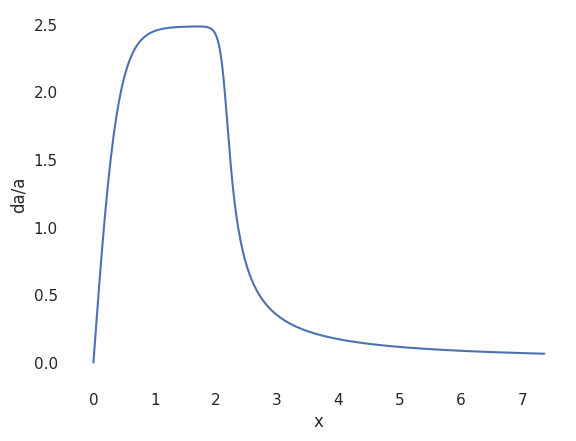

In [19]:
sns.lineplot(df_bIX_upside, x='x', y='da/a')

In [20]:
df_bIX_downside = pd.read_csv('bianchiIX_100p_downside.txt', sep=" ", header=None)
df_bIX_downside.columns = ['x', 'a', 'da', 'phi']
df_bIX_downside['da/a'] = df_bIX_downside['da'] / df_bIX_downside['a']
df_bIX_downside['x'] = df_bIX_downside['x'] - 2.36229

<Axes: xlabel='x', ylabel='da/a'>

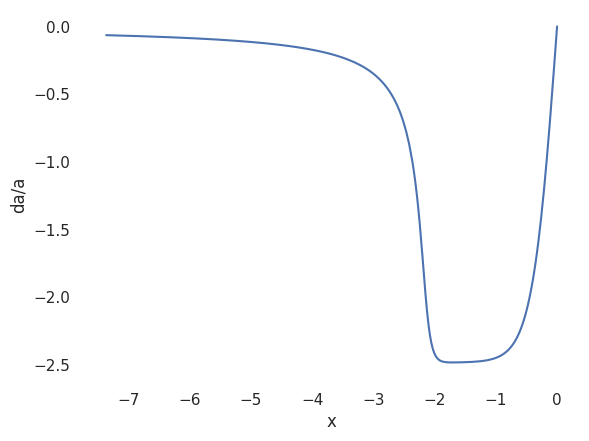

In [21]:
sns.lineplot(df_bIX_downside, x='x', y='da/a')

In [22]:
df_bIX_merged = pd.concat([df_bIX_downside, df_bIX_upside], axis=0)
df_bIX_merged

,x,a,da,phi,da/a
0,-7.36229,-2.56315,0.165301,-3.51926,-0.064491
1,-7.31229,-2.55486,0.166291,-3.50952,-0.065088
2,-7.26229,-2.54652,0.167296,-3.49970,-0.065696
3,-7.21229,-2.53813,0.168318,-3.48978,-0.066316
4,-7.16229,-2.52968,0.169357,-3.47977,-0.066948
...,...,...,...,...,...
196,7.16229,2.52968,0.169357,-3.47977,0.066948
197,7.21229,2.53813,0.168318,-3.48978,0.066316
198,7.26229,2.54652,0.167296,-3.49970,0.065696
199,7.31229,2.55486,0.166291,-3.50952,0.065088


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

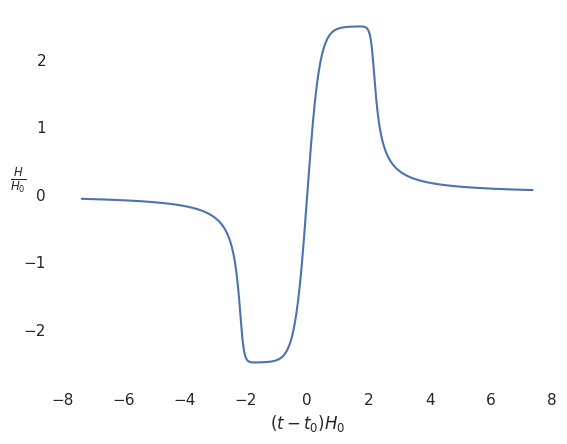

In [23]:
sns.set(rc={'axes.facecolor': 'white'})
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged, x='x', y='da/a', ax=ax)


[(0.0, 4.6), (0.8, 1.05)]

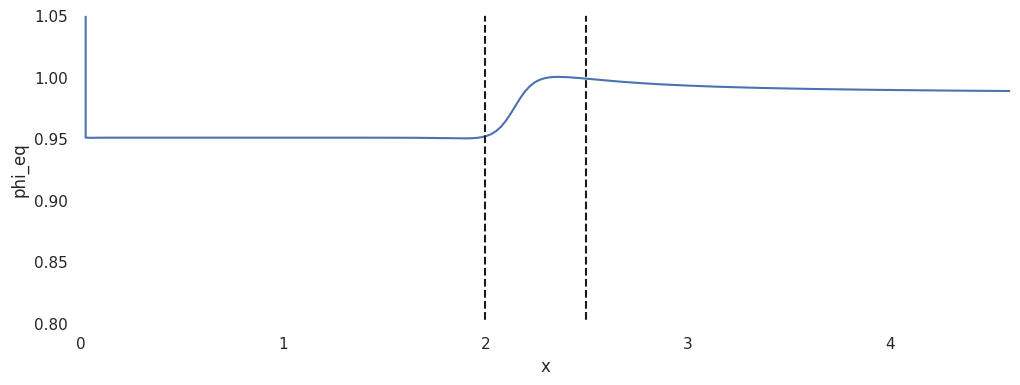

In [24]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([2, 2], [0, 1.05], color='k', linestyle='--')
ax.plot([2.5, 2.5], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 4.6), ylim=(0.8, 1.05))
# dphi0, const

[(0.0, 0.05), (0.8, 1.05)]

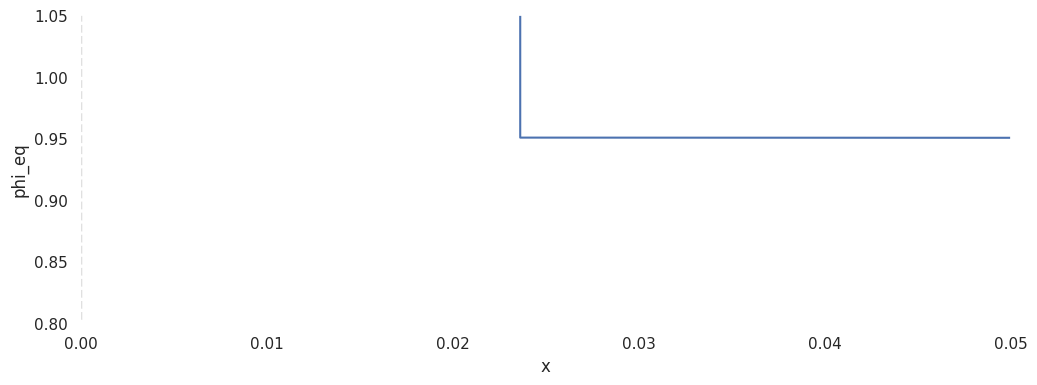

In [25]:
omega_2 = 1e-3
eta = 18*1e-3
a_iv = 1.0
da_iv = 1.0
dphi0 = 0.5 * math.log(3/4/math.pi * (da_iv**2/a_iv**2+omega_2/a_iv**2)/(1-3*eta*(3*da_iv**2/a_iv**2+omega_2/a_iv**2)))
const = math.exp(dphi0) * (3 * eta * (1 + omega_2) - 1)
# df['phi_eq'] = (df['a']**3 * math.exp(df['phi'])*(3*eta*((df['da']/df['a'])**2 + omega_2/df['a']**2)-1))/const
df_bIX_upside['phi_eq'] = (df_bIX_upside['a']**3 * df_bIX_upside['phi'].apply(lambda x: math.exp(x)) * (3 * eta * ((df_bIX_upside['da'] / df_bIX_upside['a'])**2 + omega_2/df_bIX_upside['a']**2) - 1))/const
_, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(df_bIX_upside, x='x', y='phi_eq', ax=ax) 
ax.plot([-0.5, -0.5], [0, 1.05], color='k', linestyle='--')
ax.plot([0.0, 0.0], [0, 1.05], color='k', linestyle='--')
ax.set(xlim=(0, 0.05), ylim=(0.8, 1.05))
# dphi0, const

In [48]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_100p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 2.44

<Axes: xlabel='x', ylabel='da/a'>

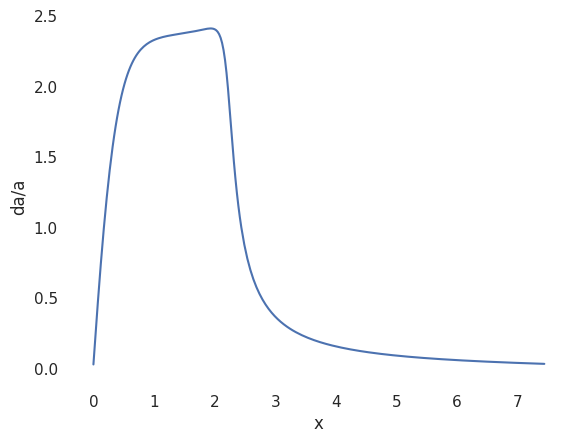

In [49]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [50]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_100p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 2.44

<Axes: xlabel='x', ylabel='da/a'>

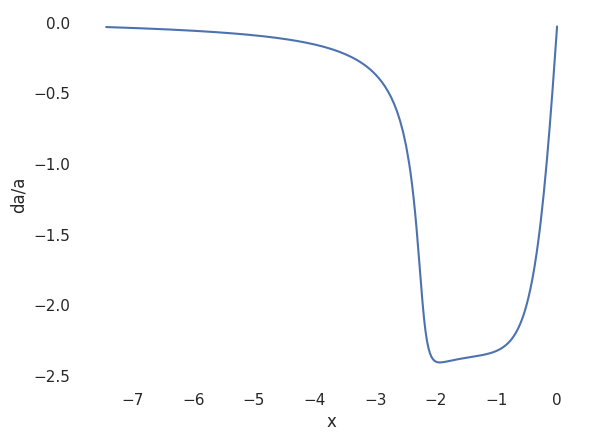

In [51]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [52]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a

,x,a,da,phi,s,da/a
0,-7.44,2.26771,-0.072102,-3.13912,-0.000091,-0.031795
1,-7.39,2.26406,-0.073587,-3.13429,-0.000092,-0.032502
2,-7.34,2.26035,-0.075089,-3.12936,-0.000092,-0.033220
3,-7.29,2.25655,-0.076607,-3.12432,-0.000093,-0.033949
4,-7.24,2.25269,-0.078144,-3.11917,-0.000093,-0.034689
...,...,...,...,...,...,...
196,7.24,2.25269,0.078144,-3.11917,0.000093,0.034689
197,7.29,2.25655,0.076607,-3.12432,0.000093,0.033949
198,7.34,2.26035,0.075089,-3.12936,0.000092,0.033220
199,7.39,2.26406,0.073587,-3.13429,0.000092,0.032502


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

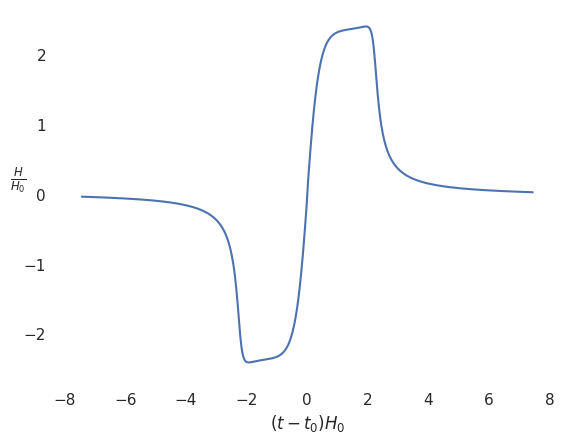

In [53]:
sns.set(rc={'axes.facecolor': 'white'})
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)


In [60]:
df_bIX_upside_a = pd.read_csv('bianchiIX_anisotropic_300p_upside.txt', sep=" ", header=None)
df_bIX_upside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_upside_a['da/a'] = df_bIX_upside_a['da'] / df_bIX_upside_a['a']
df_bIX_upside_a['x'] = df_bIX_upside_a['x'] + 2.44

<Axes: xlabel='x', ylabel='da/a'>

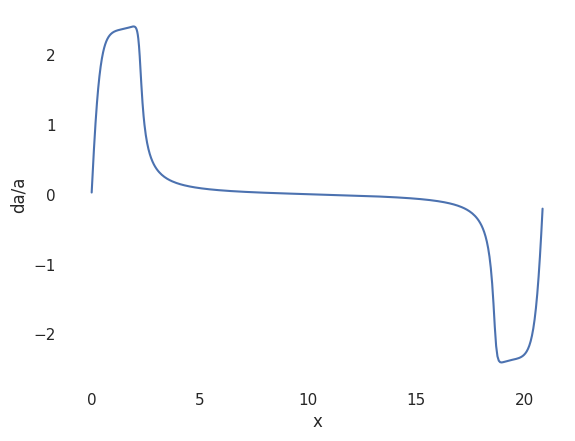

In [61]:
sns.lineplot(df_bIX_upside_a, x='x', y='da/a')

In [62]:
df_bIX_downside_a = pd.read_csv('bianchiIX_anisotropic_300p_downside.txt', sep=" ", header=None)
df_bIX_downside_a.columns = ['x', 'a', 'da', 'phi', 's']
df_bIX_downside_a['da/a'] = df_bIX_downside_a['da'] / df_bIX_downside_a['a']
df_bIX_downside_a['x'] = df_bIX_downside_a['x'] - 2.44

<Axes: xlabel='x', ylabel='da/a'>

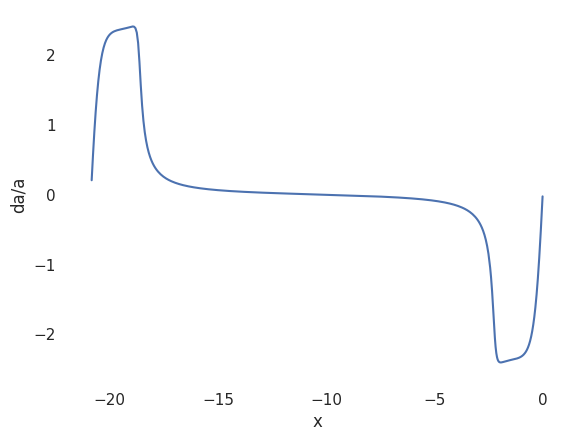

In [63]:
sns.lineplot(df_bIX_downside_a, x='x', y='da/a')

In [64]:
df_bIX_merged_a = pd.concat([df_bIX_downside_a, df_bIX_upside_a], axis=0)
df_bIX_merged_a

,x,a,da,phi,s,da/a
0,-20.8400,0.007373,0.001501,19.4490,-1.501230e-13,0.203553
1,-20.7787,0.007550,0.004262,17.3139,-1.000270e-11,0.564479
2,-20.7173,0.007897,0.007049,16.2379,-7.520190e-11,0.892624
3,-20.6560,0.008417,0.009933,15.4666,-2.904680e-10,1.180189
4,-20.5947,0.009119,0.012991,14.8324,-8.120240e-10,1.424642
...,...,...,...,...,...,...
596,20.5947,0.009119,-0.012991,14.8324,8.120240e-10,-1.424642
597,20.6560,0.008417,-0.009933,15.4666,2.904680e-10,-1.180189
598,20.7173,0.007897,-0.007049,16.2379,7.520190e-11,-0.892624
599,20.7787,0.007550,-0.004262,17.3139,1.000270e-11,-0.564479


<Axes: xlabel='$(t-t_0)H_0$', ylabel='$\\frac{H}{H_0}$'>

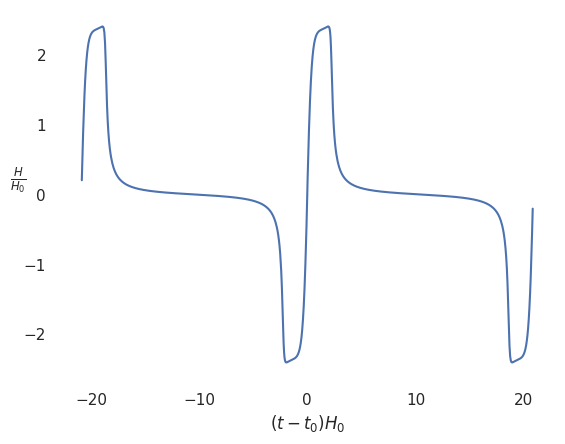

In [65]:
sns.set(rc={'axes.facecolor': 'white'})
_, ax = plt.subplots()
ax.set_ylabel(r"$\frac{H}{H_0}$", rotation=0)
ax.set_xlabel(r"$(t-t_0)H_0$")
sns.lineplot(df_bIX_merged_a, x='x', y='da/a', ax=ax)
